In [654]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [655]:
#simulation parameters
n=10
step=0.001
t=np.arange(0,n,step)

In [656]:
#signal parameters
sigma_noise=0.1
filter_num=3

In [657]:
def AWGN(n, sigma):
	return np.random.normal(0,sigma,n)

In [658]:
def BinarySource(n):
	return np.random.randint(0,2,n)

In [659]:
def binarycode_to_signal(bitstream, step):
    T = 1  # assume the pulse period is 1
    A = 1  # assume the amplitude is 1
    pulse = np.ones(int(T/step))
    pulse = pulse*A
    signal = np.zeros(len(bitstream)*len(pulse))
    # Polar nonreturn to zero
    for i in range(len(bitstream)):
        if bitstream[i] == 1:
            signal[i*len(pulse):(i+1)*len(pulse)] = 1*pulse
        else:
            signal[i*len(pulse):(i+1)*len(pulse)] = -1*pulse
    return signal


In [660]:
#generate the binary symbols
bitstream = BinarySource(n)
print(bitstream)

[1 0 0 1 1 0 0 1 0 0]


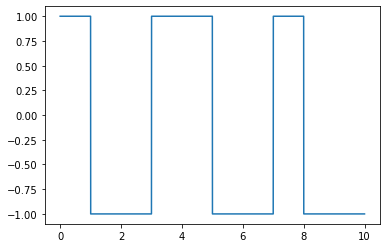

In [661]:
#generate the binary signal
signal=binarycode_to_signal(bitstream,step)

plt.plot(t,signal)
plt.show()

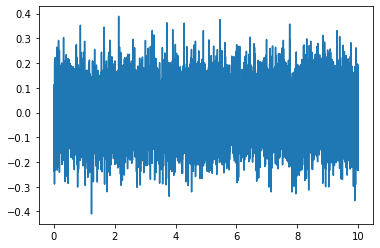

In [662]:
#generate the noise
noise=AWGN(len(signal),sigma_noise)

plt.plot(t,noise)
plt.show()

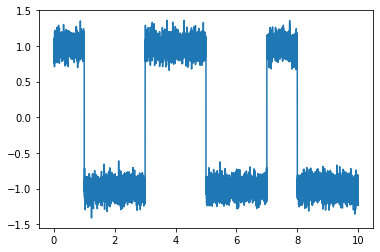

In [663]:
#add the noise to the signal
signal_noise=signal+noise

plt.plot(t,signal_noise)
plt.show()

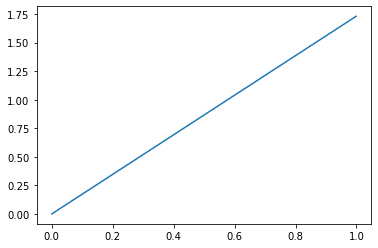

In [664]:
# construct the resive filter

filter1 = np.ones(int(1/step))
filter2 = np.ones(1)
filter3 = np.sqrt(3)*np.arange(0, 1, step)
filter = filter1 if filter_num == 1 else filter2 if filter_num == 2 else filter3
filter = np.concatenate((filter, np.zeros(int(1/step)-len(filter))))
plt.plot(np.arange(0, 1, step), filter)
plt.show()


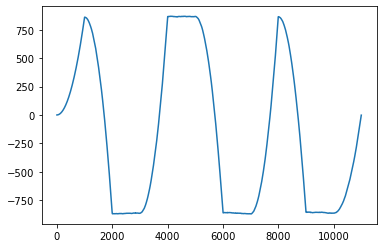

In [665]:
#filter the signal
signal_noise_filter=np.convolve(signal_noise,filter)

plt.plot(signal_noise_filter)
plt.show()

In [666]:
#sample the filtered signal
sampling_period = int(1/step)
samples = np.zeros(n)
for i in range(len(samples)):
    samples[i] = signal_noise_filter[(i+1)*sampling_period]


In [667]:
#decode the samples
reconstructed_bitstram=(samples>0)*1
print(reconstructed_bitstram)

[1 0 0 1 1 0 0 1 0 0]


In [668]:
#results
print("Total:",len(bitstream))
print("Wrong:",np.sum(bitstream!=reconstructed_bitstram))
print("Ratio:",np.sum(bitstream!=reconstructed_bitstram)/len(bitstream))

Total: 10
Wrong: 0
Ratio: 0.0
